In [118]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm


In [2]:
data = pd.read_csv(r'F:\Naive Bayes Donor\preprocessed_data.csv')

In [3]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [6]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42)

In [8]:
vectorizer_bow = CountVectorizer(min_df = 10,ngram_range = (1, 4), max_features = 50000)
vectorizer_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values) 

X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)


print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)


(73196, 50000) (73196,)
(36052, 50000) (36052,)


In [9]:
tfidfvectorizer = TfidfVectorizer(min_df = 10, max_features = 50000)
text_tfidf = tfidfvectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf =tfidfvectorizer.transform(X_train['essay'].values) 
X_test_essay_tfidf =tfidfvectorizer.transform(X_test['essay'].values)


print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)


(73196, 14266) (73196,)
(36052, 14266) (36052,)


In [10]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values)

X_train_state = vectorizer_state.transform(X_train['school_state'].values)
X_test_state = vectorizer_state.transform(X_test['school_state'].values)


print(X_train_state.shape, y_train.shape)
print(X_test_state.shape, y_test.shape)


(73196, 51) (73196,)
(36052, 51) (36052,)


In [21]:
vectorizer_prefix= CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values)

X_train_teacher = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher = vectorizer_prefix.transform(X_test['teacher_prefix'].values)


print(X_train_teacher.shape, y_train.shape)
print(X_test_teacher.shape, y_test.shape)


(73196, 5) (73196,)
(36052, 5) (36052,)


In [12]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) 
X_train_grade = vectorizer_grade.transform(X_train['project_grade_category'].values)

X_test_grade = vectorizer_grade.transform(X_test['project_grade_category'].values)



print(X_train_grade.shape, y_train.shape)

print(X_test_grade.shape, y_test.shape)


(73196, 4) (73196,)
(36052, 4) (36052,)


In [13]:
vectorizer_category = CountVectorizer()
vectorizer_category.fit(X_train['clean_categories'].values)

X_train_category= vectorizer_category.transform(X_train['clean_categories'].values)

X_test_category = vectorizer_category.transform(X_test['clean_categories'].values)


print(X_train_category.shape, y_train.shape)

print(X_test_category.shape, y_test.shape)


(73196, 9) (73196,)
(36052, 9) (36052,)


In [15]:
vectorizer_sub = CountVectorizer()
vectorizer_sub.fit(X_train['clean_subcategories'].values)

X_train_subcategory = vectorizer_sub.transform(X_train['clean_subcategories'].values)

X_test_subcategory = vectorizer_sub.transform(X_test['clean_subcategories'].values)


print(X_train_subcategory.shape, y_train.shape)

print(X_test_subcategory.shape, y_test.shape)

(73196, 30) (73196,)
(36052, 30) (36052,)


In [26]:
normalizer = Normalizer()

X_train_price = normalizer.transform(X_train['price'].values.reshape(-1, 1))
X_test_price = normalizer.transform(X_test['price'].values.reshape(-1, 1))



print(X_train_price.shape, y_train.shape)

print(X_test_price.shape, y_test.shape)


(73196, 1) (73196,)
(36052, 1) (36052,)


In [25]:
normalizer = Normalizer()

X_train_submission = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_submission = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print(X_train_submission.shape, y_train.shape)

print(X_test_submission.shape, y_test.shape)


(73196, 1) (73196,)
(36052, 1) (36052,)


#### Concatinating SET-1

In [28]:

X_train_set1 = hstack((X_train_essay_bow, X_train_state, X_train_teacher, X_train_grade, X_train_price,
                         X_train_category, X_train_subcategory, X_train_submission)).tocsr()

X_test_set1 = hstack((X_test_essay_bow, X_test_state, X_test_teacher, X_test_grade, X_test_price,
                        X_test_category, X_test_subcategory, X_test_submission)).tocsr()

print(X_train_set1.shape)
print(X_test_set1.shape)

(73196, 50101)
(36052, 50101)


#### Concatinating SET-2

In [29]:
X_train_set2 = hstack((X_train_essay_tfidf, X_train_state, X_train_teacher, X_train_grade, X_train_price, 
                       X_train_category, X_train_subcategory, X_train_submission)).tocsr()

X_test_set2 = hstack((X_test_essay_tfidf, X_test_state, X_test_teacher, X_test_grade, X_test_price, 
                      X_test_category, X_test_subcategory, X_test_submission)).tocsr()

print(X_train_set2.shape)
print(X_test_set2.shape)

(73196, 14367)
(36052, 14367)


### GRID SEARCH CV (SET 1 )

In [97]:
model = MultinomialNB(class_prior = [0.5, 0.5])
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}

#10 folds CV
clf = GridSearchCV(model, param, scoring = 'roc_auc',cv = 10, return_train_score = True) 
clf.fit(X_train_set1, y_train) 

train = clf.cv_results_['mean_train_score']
train_std = clf.cv_results_['std_train_score']
cv = clf.cv_results_['mean_test_score'] 
cv_std = clf.cv_results_['std_test_score']


#### plotting Hyper Param v/s AUC

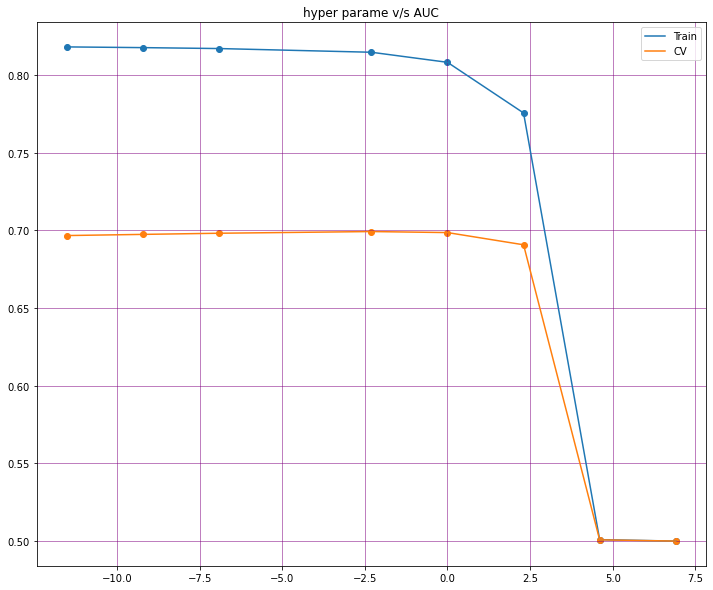

In [98]:
log_param = []

for i in param['alpha']:
    log_param.append(m.log(i))
    
plt.figure(figsize = (12, 10))
plt.grid()
plt.plot(log_param, train, label = 'Train')
plt.plot(log_param, cv, label = 'CV')  
plt.scatter(log_param, train)
plt.scatter(log_param, cv)
plt.legend()

plt.title("hyper parame v/s AUC")
plt.grid(color = 'purple', linestyle = '-', linewidth = 0.5)

### ROC plot 

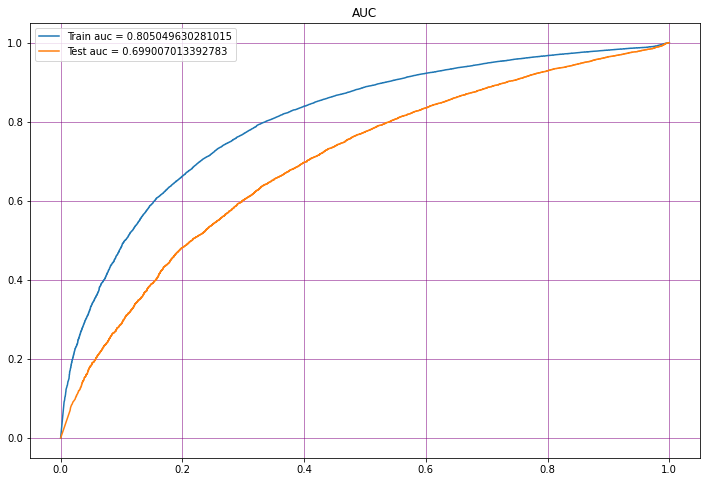

In [99]:
model_set1 = MultinomialNB(alpha =  10^2, class_prior = [0.5, 0.5])
model_set1.fit(X_train_set1, y_train)

y_train_prob = clf.predict_proba(X_train_set1)[:, 1]
y_test_prob = clf.predict_proba(X_test_set1 )[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize = (12, 8))
plt.plot(train_fpr, train_tpr, label = "Train auc = " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test auc = " + str(auc(test_fpr, test_tpr)))
plt.legend()

plt.title("AUC")
plt.grid(color = 'purple', lw = 0.5)

#### confusion matrix

In [85]:
def best_threshold(threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr * (1 - fpr))]
    return t

def best_t(proba, threshold):
    
    predictions = []
    for i in proba:
        if i >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

[[ 8210  2873]
 [16573 45540]]


<AxesSubplot:>

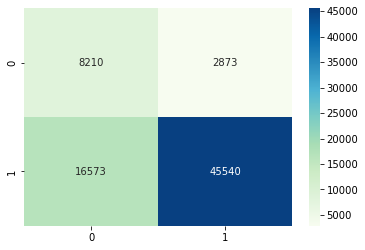

In [86]:
final_t = best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = metrics.confusion_matrix(y_train, best_t(y_train_prob, final_t))

print(cm)
sns.heatmap(cm, annot = True, fmt ='d',cmap = 'GnBu')

[[ 3653  1806]
 [11096 19497]]


<AxesSubplot:>

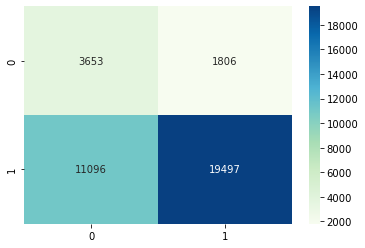

In [87]:
final_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = metrics.confusion_matrix(y_test, best_t(y_test_prob, final_t))

print(cm)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'GnBu')

### GRID SEARCH CV (SET 1 )

In [100]:
model = MultinomialNB(class_prior = [0.5, 0.5])
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}

#10 folds CV
clf = GridSearchCV(model, param, scoring = 'roc_auc',cv = 10, return_train_score = True) 
clf.fit(X_train_set2, y_train) 

train = clf.cv_results_['mean_train_score']
train_std = clf.cv_results_['std_train_score']
cv = clf.cv_results_['mean_test_score'] 
cv_std = clf.cv_results_['std_test_score']


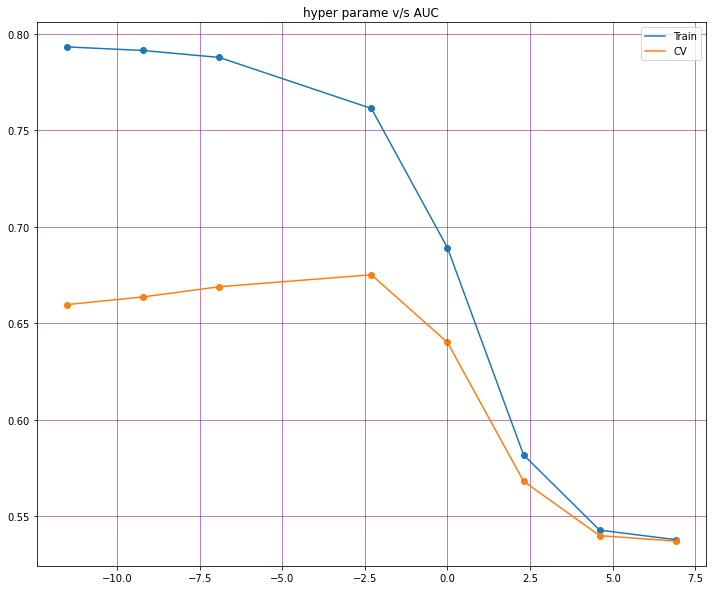

In [101]:


log_param = []

for i in param['alpha']:
    log_param.append(m.log(i))
    
plt.figure(figsize = (12, 10))
plt.grid()
plt.plot(log_param, train, label = 'Train')
plt.plot(log_param, cv, label = 'CV')  
plt.scatter(log_param, train)
plt.scatter(log_param, cv)
plt.legend()

plt.title("hyper parame v/s AUC")
plt.grid(color = 'purple', linestyle = '-', linewidth = 0.5)

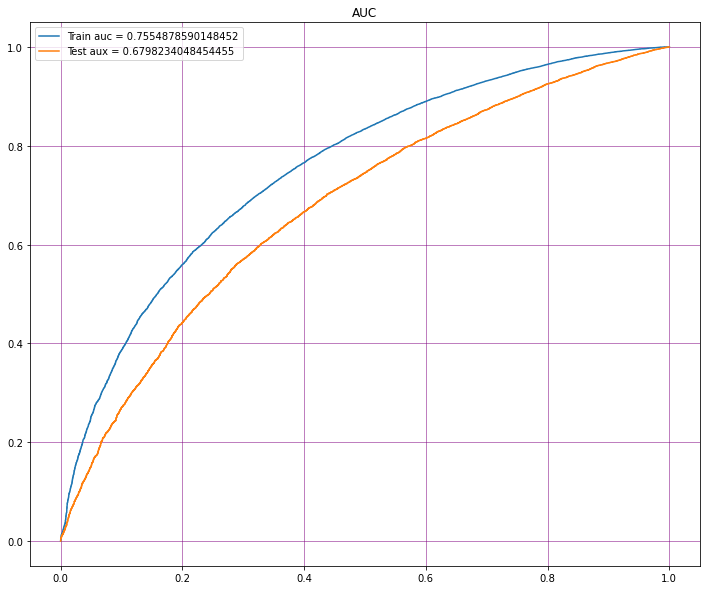

In [102]:
model_set2 = MultinomialNB(alpha = 10^2, class_prior = [0.5, 0.5])
model_set2.fit(X_train_set2, y_train)

y_train_probs = clf.predict_proba(X_train_set2)[:, 1] 
y_test_probs = clf.predict_proba(X_test_set2)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize = (12, 10))
plt.plot(train_fpr, train_tpr, label = "Train auc = " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test aux = " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.title("AUC")
plt.grid(color = 'purple',lw = 0.5)

#### Confusion matrix

[[ 7676  3407]
 [19529 42584]]


<AxesSubplot:>

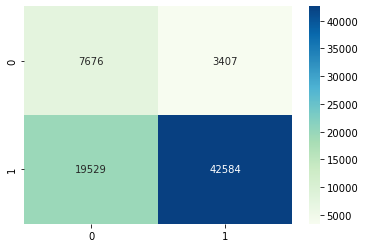

In [103]:
final_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = metrics.confusion_matrix(y_train, best_t(y_train_probs, final_t))

print(cm)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'GnBu')

[[ 3555  1904]
 [11627 18966]]


<AxesSubplot:>

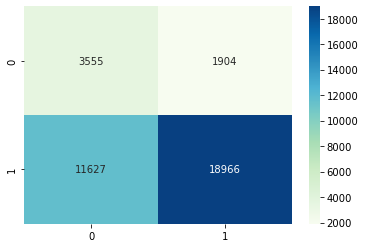

In [104]:
final_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = metrics.confusion_matrix(y_test, best_t(y_test_probs, final_t))
  
print(cm)
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'GnBu')

#### Top 20 features

In [130]:
features = []


for fe in vectorizer_bow.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_state.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_prefix.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_grade.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_category.get_feature_names() :
    features.append(fe)
    
for fe in vectorizer_sub.get_feature_names() :
    features.append(fe)
    
features.append("price")
features.append("teacher_number_of_previously_posted_projects")

neg = model_set1.feature_log_prob_[0, :].argsort()   
pos = model_set1.feature_log_prob_[1, :].argsort()


print(np.take(features, neg[-20:]))
print("\n")
print(np.take(features, pos[-20:]))

['love' 'teacher_number_of_previously_posted_projects' 'come' 'work'
 'need' 'we' 'many' 'nannan' 'appliedlearning' 'my students' 'the' 'help'
 'they' 'learn' 'not' 'classroom' 'my' 'learning' 'school' 'students']


['teacher_number_of_previously_posted_projects' 'use' 'reading' 'work'
 'need' 'we' 'nannan' 'many' 'appliedlearning' 'help' 'learn'
 'my students' 'not' 'they' 'the' 'classroom' 'learning' 'my' 'school'
 'students']


In [131]:
from prettytable import PrettyTable # showing no module named 'prettytable, even thought I have installed it'

table = PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper Param"] 
table.add_row(["BOW", "Naive Bayes", 10^2])
table.add_row(["TFIDF", "Naive Bayes", 10^2])
print(table)

ModuleNotFoundError: No module named 'prettytable'